In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

import warnings
warnings.filterwarnings('ignore')

In [2]:
# get Turkey's energy production dataset from epias
start_date = '2020-01-01'
end_date = '2021-01-01'
production = uretim.gerceklesen(start_date, end_date,)

In [3]:
production.head()

,Tarih,Saat,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Toplam
0,2020-01-01,0,6166.40,3761.62,5780.09,1545.26,7302.54,770.50,0.0,35.5,1157.82,293.65,572.31,396.65,0,0,278.0,28060.34
1,2020-01-01,1,5161.03,3079.97,5792.66,1548.51,7286.46,776.18,0.0,35.8,1164.57,273.78,575.65,392.46,0,0,394.0,26481.07
2,2020-01-01,2,5149.52,2160.79,5755.22,1460.39,7281.67,787.75,0.0,36.3,1167.74,273.78,585.67,390.22,0,0,172.0,25221.05
3,2020-01-01,3,3860.16,2292.47,5793.94,1591.92,7299.57,815.19,0.0,36.6,1168.91,271.57,569.56,392.99,0,0,154.0,24246.88
4,2020-01-01,4,3437.43,2470.96,5626.99,1653.69,7299.74,939.26,0.0,33.0,1167.93,273.78,374.90,401.09,0,0,-13.0,23665.77


In [4]:
production.describe()

,Saat,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Toplam
count,8808.00000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.0,8808.0,8808.000000,8808.000000
mean,11.50000,7746.026504,6515.794933,4303.827785,2331.419566,7111.608642,2788.028970,47.980268,35.631681,1061.087693,252.972661,431.470344,463.165296,0.0,0.0,-62.418569,33026.595775
std,6.92258,3952.323549,3171.403680,622.512318,1448.579504,1716.678584,1608.350955,66.317553,3.309019,105.220071,79.484606,158.347459,36.506329,0.0,0.0,315.830842,5495.008940
min,0.00000,496.660000,366.190000,2189.100000,419.440000,992.650000,139.760000,0.000000,0.000000,663.530000,48.570000,167.240000,369.680000,0.0,0.0,-1949.250000,15246.640000
25%,5.75000,3980.625000,3902.125000,3921.495000,1090.195000,6708.195000,1370.720000,0.000000,34.200000,993.385000,211.960000,272.177500,439.615000,0.0,0.0,-313.360000,29067.472500
50%,11.50000,8929.805000,6796.245000,4305.005000,1809.795000,7656.220000,2588.285000,2.670000,36.400000,1089.000000,242.880000,438.840000,458.440000,0.0,0.0,-85.000000,32908.105000
75%,17.25000,11058.337500,9052.125000,4732.692500,3552.550000,8340.122500,4092.695000,93.282500,37.800000,1141.867500,333.390000,598.862500,480.445000,0.0,0.0,182.000000,37484.857500
max,23.00000,14615.630000,15891.780000,6149.070000,5744.500000,8790.980000,6861.040000,297.990000,43.600000,1255.580000,362.100000,692.620000,596.090000,0.0,0.0,789.000000,45210.030000


In [5]:
production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8808 entries, 0 to 8807
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tarih           8808 non-null   datetime64[ns]
 1   Saat            8808 non-null   int64         
 2   Doğalgaz        8808 non-null   float64       
 3   Barajlı         8808 non-null   float64       
 4   Linyit          8808 non-null   float64       
 5   Akarsu          8808 non-null   float64       
 6   İthal Kömür     8808 non-null   float64       
 7   Rüzgar          8808 non-null   float64       
 8   Güneş           8808 non-null   float64       
 9   Fuel Oil        8808 non-null   float64       
 10  Jeo Termal      8808 non-null   float64       
 11  Asfaltit Kömür  8808 non-null   float64       
 12  Taş Kömür       8808 non-null   float64       
 13  Biyokütle       8808 non-null   float64       
 14  Nafta           8808 non-null   int64         
 15  LNG      

In [18]:
feature_cols = [col for col in production.columns if col not in ['Toplam', 'Tarih', 'Saat',
                                                                 'Nafta', 'LNG']]
pred_cols = ['Toplam']

X = production[feature_cols]
y = production[pred_cols]

y = y.where(y<y.mean(), 1)
y = y.where(y==1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [19]:
X_train.head(3)

,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Uluslararası
7415,10324.33,1710.78,4770.01,1064.93,8104.81,5437.11,0.00,33.3,1147.09,214.16,566.87,529.09,0.0
1362,3974.40,10017.49,4179.61,3126.24,7449.95,5954.93,2.28,35.3,1028.20,320.15,275.35,457.78,532.0
3855,6432.41,9685.90,5169.32,3269.51,7567.05,1009.81,104.39,38.3,889.29,242.88,578.09,439.65,483.0


In [21]:
y_train.head(3)

,Toplam
7415,1.0
1362,1.0
3855,1.0


In [24]:
%%capture
# define the model
model = RandomForestClassifier()

# model evaluation 10 fold 3 repeats
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

In [27]:
np.mean(n_scores), np.std(n_scores)

(0.9705578199704193, 0.0065721815697254)

In [32]:
# prediction
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/tmp/ipykernel_225/2287817526.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [35]:
metrics.confusion_matrix(y_test, y_pred)

array([[1286,   47],
       [  54, 1256]])

In [37]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1333
         1.0       0.96      0.96      0.96      1310

    accuracy                           0.96      2643
   macro avg       0.96      0.96      0.96      2643
weighted avg       0.96      0.96      0.96      2643



In [44]:
roc_auc_score = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])

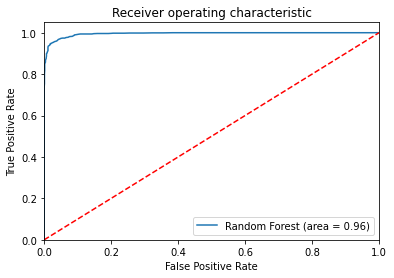

In [47]:
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
# hyperparameters

In [49]:
# let's take a look at bootstrap sample effect --> max_sample 

In [61]:
# list of models
def get_models():
    models = {}
    
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        if i == 1.0:
            i = None # yani tüm training size kullanılıyor none ile
        models[key] = RandomForestClassifier(max_samples=i)
    return models

In [62]:
# evaluating the model function
def evaluate_model(model, X, y):
    # cross validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # scores
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [63]:
my_models = get_models()

In [70]:
results, names = [], []
for name, model in my_models.items():
    
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print(name, np.mean(scores), np.std(scores))

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

0.1 0.9526908936552372 0.00915950318511347


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

0.2 0.9592863983666253 0.008565270191883932


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

0.3 0.9626926827899275 0.008437145675316714


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

0.4 0.9643687687245224 0.008596854064322352


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

0.5 0.9654490903477936 0.00806152638288181


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

0.6 0.9658284921453478 0.0072766276565349175


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

0.7 0.9655576662667423 0.008140308308580094


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

0.8 0.9667475285384524 0.006905858612136092


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

0.9 0.9672874262420453 0.0069361715630976315


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/donmezk16/Downloads/anaconda3/e

1.0 0.9668546135118259 0.0068443694007715595


In this case, the results suggest that using a bootstrap sample size that is equal to the size of the training dataset achieves the best results on this dataset.

This is the default and it should probably be used in most cases.

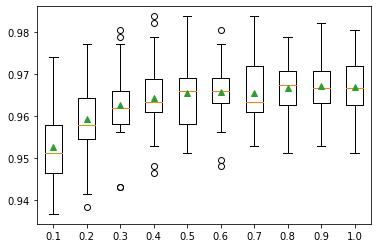

In [73]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

The example below explores the effect of the number of features randomly selected at each split point on model accuracy. We will try values from 1 to 7 and would expect a small value, around four, to perform well based on the heuristic.

yarın https://machinelearningmastery.com/random-forest-ensemble-in-python/ buradan devam et max_features'ı tarıyordun